In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import IPython.display as ipd
import statsmodels.api as stm
%matplotlib inline
plt.rcParams['figure.figsize'] = (9,7)
from sklearn import preprocessing

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn import metrics 

# Input Data #

In [32]:
class dataTh:
    
    def __init__ (self,csvfile):
        self.csvfile = csvfile
    
    def All(self):
        data = pd.read_csv(self.csvfile)
        data_all = data.iloc[:,6:34].values
        return data_all
    
    def noPitch(self):
        data = pd.read_csv(self.csvfile)
        
        # Attribute names in .csv file
        data_noPitch = data[['Dynamic','Tempo','Chroma_mean[1]','Chroma_mean[2]',
                             'Chroma_mean[3]','Chroma_mean[4]','Chroma_mean[5]' ,
                             'Chroma_mean[6]','Chroma_mean[7]','Chroma_mean[8]',
                             'Chroma_mean[9]','Chroma_mean[10]','Chroma_mean[11]',
                             'Chroma_mean[12]','Mfccs[1]','Mfccs[2]','Mfccs[3]',
                             'Mfccs[4]','Mfccs[5]','Mfccs[6]','Mfccs[7]','Mfccs[8]',
                             'Mfccs[9]','Mfccs[10]','Mfccs[11]','Mfccs[12]','Mfccs[13]']] 
        data_noPitch = data_noPitch.iloc[:,:].values        
        return data_noPitch
    
    def noTempo(self):
        data = pd.read_csv(self.csvfile)
        data_noTempo = data[['Pitch','Dynamic','Chroma_mean[1]','Chroma_mean[2]',
                             'Chroma_mean[3]','Chroma_mean[4]','Chroma_mean[5]' ,
                             'Chroma_mean[6]','Chroma_mean[7]','Chroma_mean[8]',
                             'Chroma_mean[9]','Chroma_mean[10]','Chroma_mean[11]',
                             'Chroma_mean[12]','Mfccs[1]','Mfccs[2]','Mfccs[3]',
                             'Mfccs[4]','Mfccs[5]','Mfccs[6]','Mfccs[7]','Mfccs[8]',
                             'Mfccs[9]','Mfccs[10]','Mfccs[11]','Mfccs[12]','Mfccs[13]']]
        data_noTempo = data_noTempo.iloc[:,:].values
        return data_noTempo
        
    def noPitchTempo(self):
        data = pd.read_csv(self.csvfile)
        data_noPitchTempo =  data[['Dynamic','Chroma_mean[1]','Chroma_mean[2]',
                             'Chroma_mean[3]','Chroma_mean[4]','Chroma_mean[5]' ,
                             'Chroma_mean[6]','Chroma_mean[7]','Chroma_mean[8]',
                             'Chroma_mean[9]','Chroma_mean[10]','Chroma_mean[11]',
                             'Chroma_mean[12]','Mfccs[1]','Mfccs[2]','Mfccs[3]',
                             'Mfccs[4]','Mfccs[5]','Mfccs[6]','Mfccs[7]','Mfccs[8]',
                             'Mfccs[9]','Mfccs[10]','Mfccs[11]','Mfccs[12]','Mfccs[13]']]  
        data_noPitchTempo = data_noPitchTempo.iloc[:,:].values
        return data_noPitchTempo
    
    def noAll(self):
        data = pd.read_csv(self.csvfile)
        data_noAll = data[['Chroma_mean[1]','Chroma_mean[2]','Chroma_mean[3]',
                           'Chroma_mean[4]','Chroma_mean[5]','Chroma_mean[6]',
                           'Chroma_mean[7]','Chroma_mean[8]','Chroma_mean[9]',
                           'Chroma_mean[10]','Chroma_mean[11]','Chroma_mean[12]',
                           'Mfccs[1]','Mfccs[2]','Mfccs[3]','Mfccs[4]','Mfccs[5]',
                           'Mfccs[6]','Mfccs[7]','Mfccs[8]','Mfccs[9]','Mfccs[10]',
                           'Mfccs[11]','Mfccs[12]','Mfccs[13]']]   
        data_noAll = data_noAll.iloc[:,:].values
        return data_noAll
        
    def valenceSpotify(self):
        data = pd.read_csv(self.csvfile)
        data_valence = data.iloc[:,-31].values
        return data_valence
    
    def arousalSpotify(self):
        data = pd.read_csv(self.csvfile)
        data_arousal = data.iloc[:,-30].values
        return data_arousal
    
    def emotionSpotify(self):
        data = pd.read_csv(self.csvfile)
        data_emotion = data.iloc[:,-29].values
        return data_emotion


In [44]:
data_test = pd.read_csv('C:\\Users\\TEMP\\Anaconda2\\Project_Master/Thesis_/Data_Thai.csv')

# Plot Valence-Arousal : Feature

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000183735F8>],
      dtype=object)

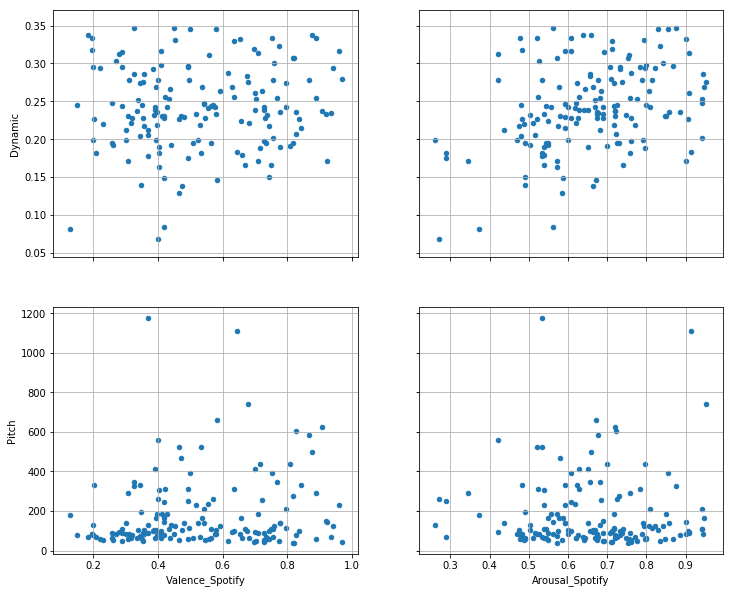

In [48]:
fig, axes = plt.subplots(nrows = 2, ncols = 2,figsize=(12, 10))
data_test.plot(x = 'Valence_Spotify',y = 'Dynamic',kind = 'scatter',
               style='^',grid='True',subplots = True,ax = axes[0,0],sharey = True)
data_test.plot(x = 'Arousal_Spotify',y = 'Dynamic',kind = 'scatter',
               style='^',grid='True',subplots = True,ax = axes[0,1],sharex = True)
data_test.plot(x = 'Valence_Spotify',y = 'Pitch',kind = 'scatter',
               style='^',grid='True',subplots = True,ax = axes[1,0])
data_test.plot(x = 'Arousal_Spotify',y = 'Pitch',kind = 'scatter',
               style='^',grid='True',subplots = True,ax = axes[1,1])

# Start #

In [33]:
dataTh = dataTh('C:\\Users\\TEMP\\Anaconda2\\Project_Master/Thesis_/Data_Thai.csv')

In [34]:
dataTh.valenceSpotify()

array([0.923, 0.827, 0.727, 0.388, 0.728, 0.371, 0.536, 0.645, 0.309,
       0.404, 0.658, 0.203, 0.464, 0.201, 0.404, 0.355, 0.399, 0.271,
       0.346, 0.42 , 0.128, 0.5  , 0.337, 0.525, 0.696, 0.34 , 0.533,
       0.704, 0.71 , 0.399, 0.494, 0.743, 0.356, 0.742, 0.544, 0.564,
       0.392, 0.577, 0.184, 0.28 , 0.82 , 0.422, 0.564, 0.39 , 0.68 ,
       0.545, 0.668, 0.754, 0.557, 0.493, 0.72 , 0.441, 0.395, 0.31 ,
       0.403, 0.584, 0.418, 0.309, 0.474, 0.827, 0.41 , 0.796, 0.777,
       0.817, 0.634, 0.482, 0.32 , 0.345, 0.877, 0.196, 0.196, 0.652,
       0.715, 0.751, 0.529, 0.57 , 0.259, 0.933, 0.659, 0.677, 0.734,
       0.593, 0.628, 0.555, 0.517, 0.327, 0.427, 0.223, 0.865, 0.96 ,
       0.412, 0.371, 0.843, 0.302, 0.449, 0.768, 0.617, 0.887, 0.508,
       0.777, 0.357, 0.837, 0.797, 0.755, 0.701, 0.542, 0.492, 0.435,
       0.351, 0.758, 0.941, 0.418, 0.452, 0.418, 0.208, 0.727, 0.347,
       0.773, 0.818, 0.636, 0.29 , 0.701, 0.316, 0.73 , 0.748, 0.709,
       0.905, 0.497,

# Split train and test set #

In [6]:
x_train_valence,x_test_valence,y_train_valence,y_test_valence = train_test_split(dataTh.noTempo(), 
                                                                                 dataTh.valenceSpotify(),
                                                                                 test_size = 0.2,random_state = 0)

x_train_arousal,x_test_arousal,y_train_arousal,y_test_arousal = train_test_split(dataTh.noTempo(),
                                                                                 dataTh.arousalSpotify(),
                                                                                 test_size = 0.2,random_state = 0)
x_train_emo,x_test_emo,y_train_emo,y_test_emo = train_test_split(dataTh.noTempo(), 
                                                                 dataTh.emotionSpotify(),
                                                                 test_size = 0.2,random_state = 0)

# Multiple Linear Regression #

In [7]:
class multiRegression:
    
    def __init__(self,x_train,y_train,x_test,y_test):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
    
    def findVA(self):
        regressor = LinearRegression()
        regressor.fit(self.x_train,self.y_train)
        y_pred = regressor.predict(self.x_test)
        
        X1 = stm.add_constant(self.x_train)
        result = stm.OLS(self.y_train, X1).fit()
        

        print(result.summary())
        return y_pred
   
        

# Run Multiple Linear Regression #

In [8]:
mlr_valence = multiRegression(x_train_valence,y_train_valence,x_test_valence,y_test_valence)
mlr_arousal = multiRegression(x_train_arousal,y_train_arousal,x_test_arousal,y_test_arousal)

# Read & Save CSV #

In [9]:
class partCSV:
    
    def __init__(self,csvname,valence,arousal):
        self.csvname = csvname
        self.valence = valence
        self.arousal = arousal
    
    def saveCSV(self):
        with open(self.csvname,'wb') as th :
            th = csv.writer(th)
            th.writerow(['Valence','Arousal'])
            th.writerows(zip(self.valence,self.arousal))
        
    def readCSV(self):
        data = pd.read_csv(self.csvname)
        csv_data = data.iloc[:,:].values
    
        return csv_data     
    

# Run CSV Part #

#### - R-squared 

In [34]:
VA_values = partCSV('VA_thai_noTempo.csv',mlr_valence.findVA(),mlr_arousal.findVA())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     2.163
Date:                Sat, 11 Aug 2018   Prob (F-statistic):            0.00330
Time:                        22:07:00   Log-Likelihood:                 49.176
No. Observations:                 124   AIC:                            -42.35
Df Residuals:                      96   BIC:                             36.62
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2831      0.297      0.954      0.3

In [35]:
VA_values.saveCSV()
VA_values.readCSV()

array([[0.4603649 , 0.50116348],
       [0.60999289, 0.69101808],
       [0.41644456, 0.6452054 ],
       [0.6029588 , 0.68017653],
       [0.60177213, 0.68957894],
       [0.73951923, 0.7848694 ],
       [0.56298913, 0.56851348],
       [0.50897122, 0.74057335],
       [0.45707498, 0.59240996],
       [0.57151633, 0.77222199],
       [0.58204025, 0.78801849],
       [0.46506084, 0.69784331],
       [0.39478882, 0.65798591],
       [0.49430781, 0.71626957],
       [0.63728483, 0.77576847],
       [0.53355006, 0.66815315],
       [0.63917206, 0.75037331],
       [0.44660321, 0.76022236],
       [0.67810235, 0.85037223],
       [0.88144225, 0.73816408],
       [0.57897997, 0.55106651],
       [0.4026805 , 0.47808801],
       [0.46602938, 0.66256087],
       [0.48766517, 0.64875427],
       [0.56764415, 0.61997723],
       [0.55747782, 0.81140278],
       [0.44672503, 0.7857131 ],
       [0.49837414, 0.63110598],
       [0.45594203, 0.67596471],
       [0.75038856, 0.91164155],
       [0.

# Emotion Annotations #

In [36]:
class annotations:
    
    def __init__(self,null):
        self.null = null
    
    def findVA(self):
        annotations_spotify = []
        plt.grid()
        
        VA = VA_values.readCSV()
        for i in range(len(VA)):
            value_val_test = VA[:,-2] 
            value_arou_test = VA[:,-1]
            if value_val_test[i] > 0.5 and value_arou_test[i] > 0.5 : # Happy
                anno = 'Happy'
                happy_plot = plt.scatter(value_val_test[i],value_arou_test[i],
                                         color = 'green',label='Happy')
            
        
            elif value_val_test[i] > 0.5 and value_arou_test[i] < 0.5 : # Peaceful
                anno = 'Peaceful'
                peaceful_plot = plt.scatter(value_val_test[i],value_arou_test[i],
                                            color = 'blue',label='Peaceful')
                #print ('Peaceful')
        
            elif value_val_test[i] < 0.5 and value_arou_test[i] > 0.5 : # Angry
                anno = 'Excited'
                excited_plot = plt.scatter(value_val_test[i],value_arou_test[i],
                                           color = 'red',label='Excited')
                #print ('Angry')
        
            elif value_val_test[i] < 0.5 and value_arou_test[i] < 0.5 : # Sad
                anno = 'Sad'
                sad_plot = plt.scatter(value_val_test[i],value_arou_test[i],
                                       color = 'black',label='Sad')
                #print ('Sad')
        
            else :
                print ('None')
        
            annotations_spotify.append(anno)
        #plt.legend(handles=[happy_plot,sad_plot],loc=)
            plt.xlim(-0.1,1.1)
            plt.ylim(-0.1,1.1)
            plt.axvline(x=0.5, ymin=0,ymax=1,color = 'black',lw=1)
            plt.axhline(y=0.5, xmin=0,xmax=1,color = 'black',lw=1)
            #plt.title('VA Model of Thai songs(Spotify)')
            plt.xlabel('Valence')
            plt.ylabel('Arousal(Energy)')
            plt.title('Multiple linear regression')
        
        return annotations_spotify


['Excited',
 'Happy',
 'Excited',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Excited',
 'Happy',
 'Happy',
 'Excited',
 'Excited',
 'Excited',
 'Happy',
 'Happy',
 'Happy',
 'Excited',
 'Happy',
 'Happy',
 'Happy',
 'Sad',
 'Excited',
 'Excited',
 'Happy',
 'Happy',
 'Excited',
 'Excited',
 'Excited',
 'Happy',
 'Peaceful']

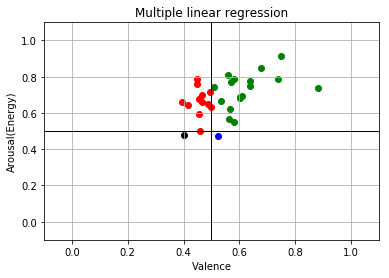

In [37]:
annotations = annotations(1)
annotations.findVA()

# Measure Performance #

### - Precision, Recall, F-measure, Accuracy

In [39]:
def perform_measure(actual,predict):
    cm = confusion_matrix(actual,predict)
    print (cm)
    
    accuracy = accuracy_score(actual,predict)*100
    print ('Accuracy of our model is equal ' + str(round(accuracy,2)) + '%')
    
    measure = classification_report(actual,predict)
    print (measure)

[[ 6  4  0  0]
 [ 4 12  0  0]
 [ 0  1  0  0]
 [ 2  0  1  1]]
Accuracy of our model is equal 61.29%
             precision    recall  f1-score   support

    Excited       0.50      0.60      0.55        10
      Happy       0.71      0.75      0.73        16
   Peaceful       0.00      0.00      0.00         1
        Sad       1.00      0.25      0.40         4

avg / total       0.65      0.61      0.60        31



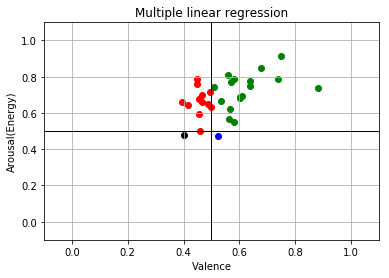

In [40]:
perform_measure(y_test_emo,annotations.findVA())

# Support Vector Regression

In [39]:
class SVRegression:
    def __init__(self,x_train,y_train,x_test,y_test):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        
    def findVA(self):
        regressor = SVR(kernel = 'linear')
        regressor.fit(self.x_train,self.y_train)
        y_pred = regressor.predict(self.x_test)

        return y_pred
    
    
    

In [40]:
svr_valence = SVRegression(x_train_valence,y_train_valence,x_test_valence,y_test_valence)
svr_arousal = SVRegression(x_train_arousal,y_train_arousal,x_test_arousal,y_test_arousal)

In [45]:
VA_values_SVR = partCSV('... .csv',svr_valence.findVA(),svr_arousal.findVA())
VA_values_SVR.saveCSV()
VA_values_SVR.readCSV()

array([[0.48640712, 0.47576857],
       [0.59100078, 0.71572923],
       [0.49509512, 0.63274179],
       [0.6196504 , 0.6851969 ],
       [0.63438266, 0.68844661],
       [0.78294554, 0.73652535],
       [0.57184475, 0.60661268],
       [0.43335662, 0.71098952],
       [0.51738477, 0.58426059],
       [0.56606072, 0.77194011],
       [0.60546803, 0.77771716],
       [0.52581255, 0.68763474],
       [0.40014619, 0.64621696],
       [0.49692579, 0.71141319],
       [0.67558735, 0.74605202],
       [0.51992531, 0.65145986],
       [0.67484287, 0.71531238],
       [0.46781853, 0.76424504],
       [0.71395801, 0.81662271],
       [0.82678716, 0.74824614],
       [0.6066466 , 0.52892273],
       [0.4654154 , 0.46261939],
       [0.49057794, 0.63852498],
       [0.4870026 , 0.64536575],
       [0.58296172, 0.6012456 ],
       [0.58534823, 0.78684566],
       [0.46899442, 0.77462419],
       [0.46610949, 0.61613814],
       [0.44142074, 0.64343507],
       [0.75344205, 0.85578014],
       [0.

In [46]:
class annotationsSVR:
    
    def __init__(self,null):
        self.null = null
    
    def findVA(self):
        annotations_spotify = []
        plt.grid()
        
        VA = VA_values_SVR.readCSV()
        for i in range(len(VA)):
            value_val_test = VA[:,-2] 
            value_arou_test = VA[:,-1]
            if value_val_test[i] > 0.5 and value_arou_test[i] > 0.5 : # Happy
                anno = 'Happy'
                happy_plot = plt.scatter(value_val_test[i],value_arou_test[i],
                                         color = 'green',label='Happy')
            
        
            elif value_val_test[i] > 0.5 and value_arou_test[i] < 0.5 : # Peaceful
                anno = 'Peaceful'
                peaceful_plot = plt.scatter(value_val_test[i],value_arou_test[i],
                                            color = 'blue',label='Peaceful')
                
        
            elif value_val_test[i] < 0.5 and value_arou_test[i] > 0.5 : # Angry
                anno = 'Excited'
                excited_plot = plt.scatter(value_val_test[i],value_arou_test[i],
                                           color = 'red',label='Excited')
                
        
            elif value_val_test[i] < 0.5 and value_arou_test[i] < 0.5 : # Sad
                anno = 'Sad'
                sad_plot = plt.scatter(value_val_test[i],value_arou_test[i],
                                       color = 'black',label='Sad')
                
        
            else :
                print ('None')
        
            annotations_spotify.append(anno)
        #plt.legend(handles=[happy_plot,sad_plot],loc=)
            plt.xlim(-0.1,1.12)
            plt.ylim(-0.1,1.12)
            plt.axvline(x=0.5, ymin=0,ymax=1,color = 'black',lw=1)
            plt.axhline(y=0.5, xmin=0,xmax=1,color = 'black',lw=1)
            #plt.title('VA Model of Thai songs(Spotify)')
            plt.xlabel('Valence')
            plt.ylabel('Arousal(Energy)')
            plt.title('Support vector regression')
        
        return annotations_spotify

['Sad',
 'Happy',
 'Excited',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Excited',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Excited',
 'Excited',
 'Happy',
 'Happy',
 'Happy',
 'Excited',
 'Happy',
 'Happy',
 'Happy',
 'Sad',
 'Excited',
 'Excited',
 'Happy',
 'Happy',
 'Excited',
 'Excited',
 'Excited',
 'Happy',
 'Peaceful']

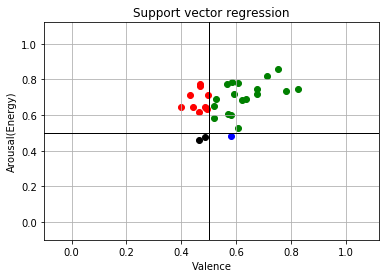

In [47]:
annotationsSVR = annotationsSVR(1)
annotationsSVR.findVA()

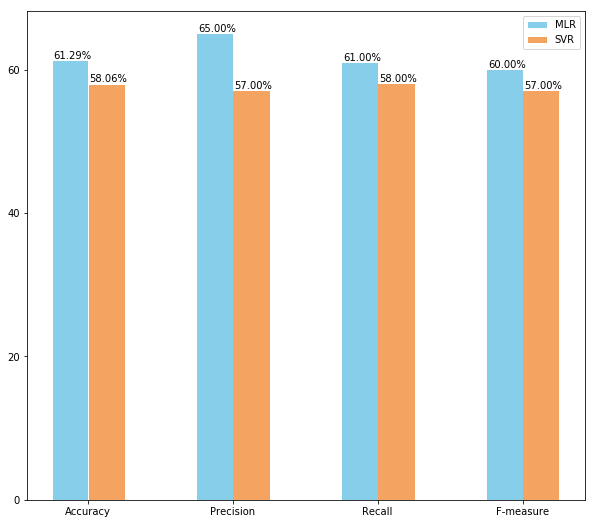

In [50]:
# set width of bar
barWidth = 0.25

mlr = [61.29, 65, 61, 60]
svr = [58.06, 57, 58, 57]

 
# Set position of bar on X axis
r1 = np.arange(len(mlr))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(10,9))
# Make the plot
bar1 = plt.bar(r1, mlr, color='#87CEEB', width=barWidth, edgecolor='white', label='MLR')
bar2 = plt.bar(r2, svr, color='#F4A460', width=barWidth, edgecolor='white', label='SVR')

for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/1.8, height, '%.2f' % float(height) + '%', ha='center', va='bottom')

# Add xticks on the middle of the group bars
#plt.xlabel('Performance measurement', fontweight='bold')
plt.locator_params(axis='y',nbins=5)
#yticks = ['0','','20','','40','','60','80']
#plt.yticks(range(80))
plt.xticks([r + 0.12 for r in range(len(mlr))], ['Accuracy', 'Precision', 'Recall', 'F-measure'],)
plt.locator_params
plt.legend()
plt.show()

